In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


# Data Preparation

In [139]:
df = pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv",sep=';',na_values='unknown')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [141]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [142]:
na_columns = ['job','marital','education','default','housing','loan']
for col in na_columns:
    df[col] = df[col].fillna(df[col].mode().values[0])
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [143]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Detected outliers'}, ylabel='age'>

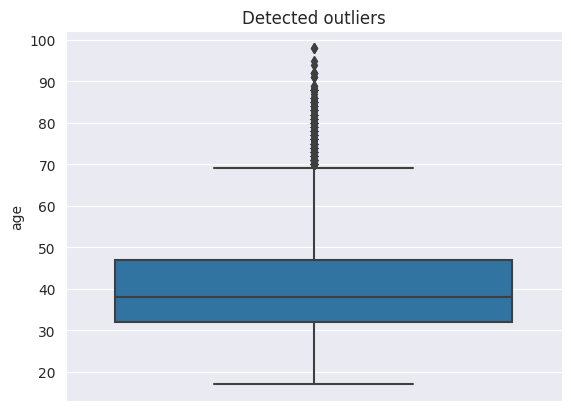

In [145]:
sns.set_style("darkgrid")
plt.title("Detected outliers")
sns.boxplot(y='age',data=df)

In [146]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
df = df[( df['age'] > q1 - 1.5 * iqr) & (df['age'] < q3+1.5 * iqr)]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


<Axes: title={'center': 'Detected outliers'}, ylabel='age'>

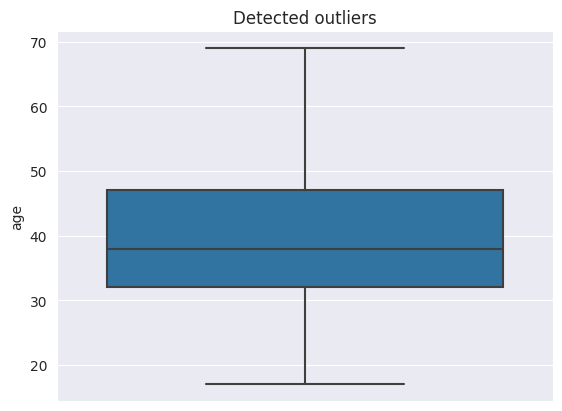

In [147]:
plt.title("Detected outliers")
sns.boxplot(y='age',data=df)

<Axes: title={'center': 'Detected outliers'}, ylabel='duration'>

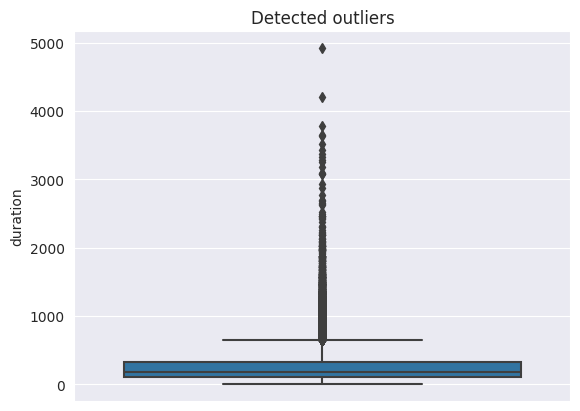

In [148]:
plt.title("Detected outliers")
sns.boxplot(y='duration',data=df)

In [149]:
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
iqr = q3 - q1
df = df[( df['duration'] > q1 - 1.5 * iqr) & (df['duration'] < q3 + 1.5 * iqr)]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


<Axes: title={'center': 'Detected outliers'}, ylabel='duration'>

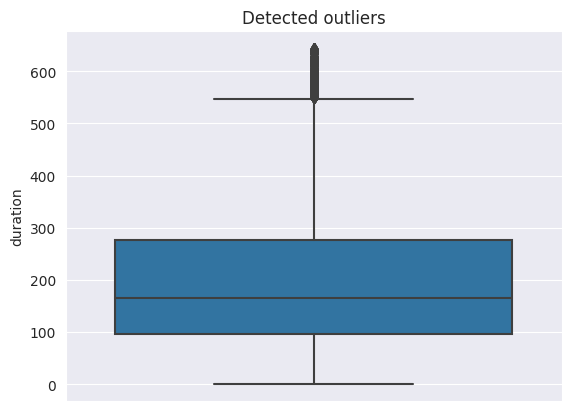

In [150]:
plt.title("Detected outliers")
sns.boxplot(y='duration',data=df)

# Exploratory Data Analysis 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(40, 8200, '<-- Mean')

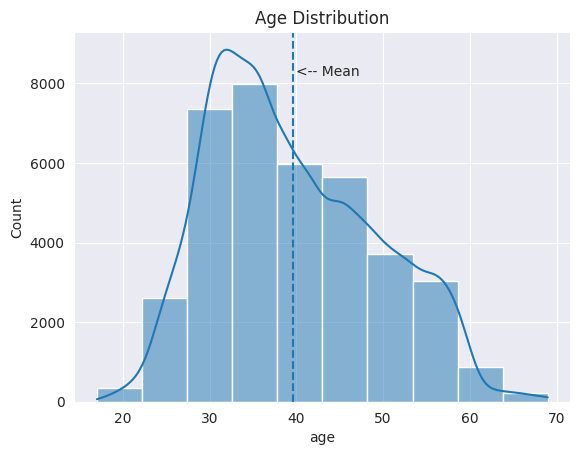

In [151]:
sns.histplot(df['age'],kde=True,bins=10)
plt.title("Age Distribution")
plt.axvline(df['age'].mean(),ls='--')
plt.text(40,8200,'<-- Mean')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(210, 6500, '<-- Mean')

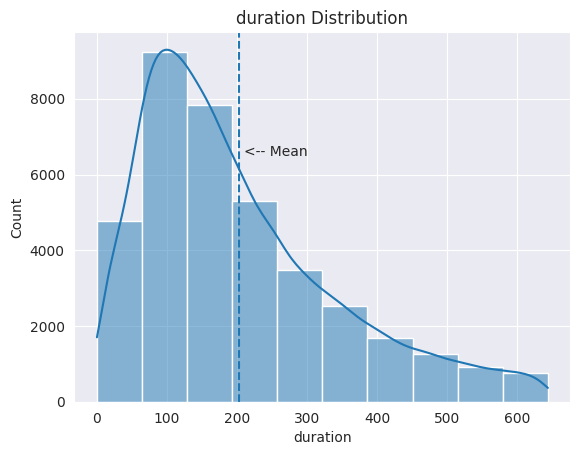

In [152]:
sns.histplot(df['duration'],kde=True,bins=10)
plt.title("duration Distribution")
plt.axvline(df['duration'].mean(),ls='--')
plt.text(210,6500,'<-- Mean')

Text(0.5, 1.0, 'jobs Distribution')

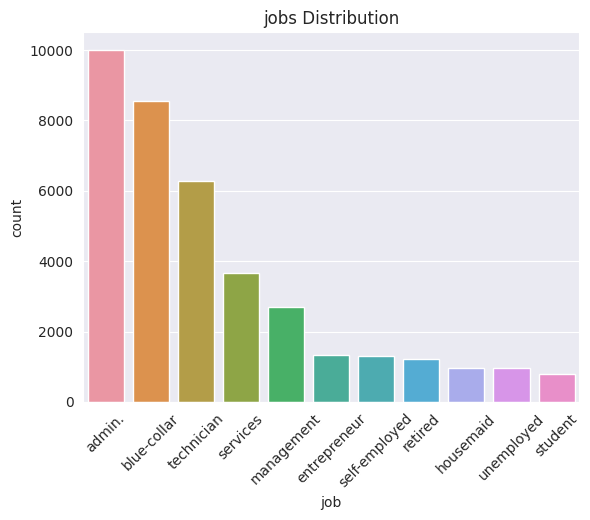

In [153]:
sns.countplot(data=df,x='job',order = df['job'].value_counts().index)
plt.xticks(rotation = 45)
plt.title("jobs Distribution")

Text(0.5, 1.0, 'most call months')

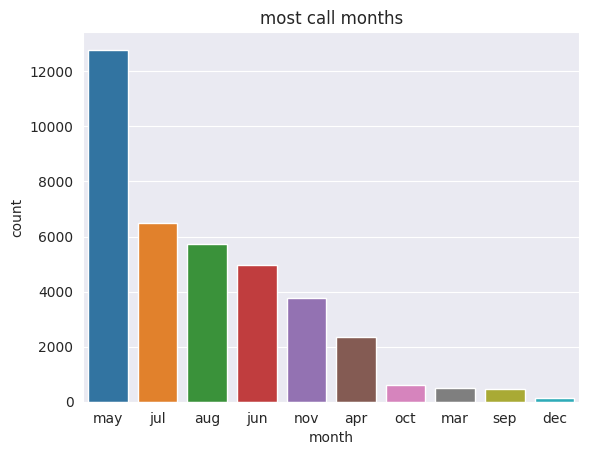

In [154]:
sns.countplot(x='month', data=df, order=df['month'].value_counts().index)
plt.title("most call months")

Text(0.5, 1.0, 'calls per day')

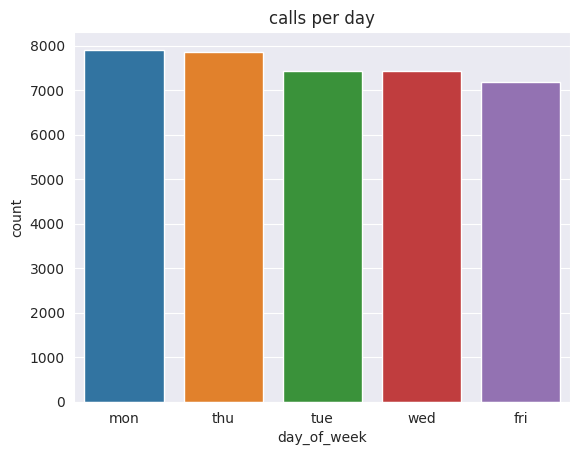

In [155]:
sns.countplot(x='day_of_week', data=df, order=df['day_of_week'].value_counts().index)
plt.title("calls per day")

<Axes: xlabel='y', ylabel='count'>

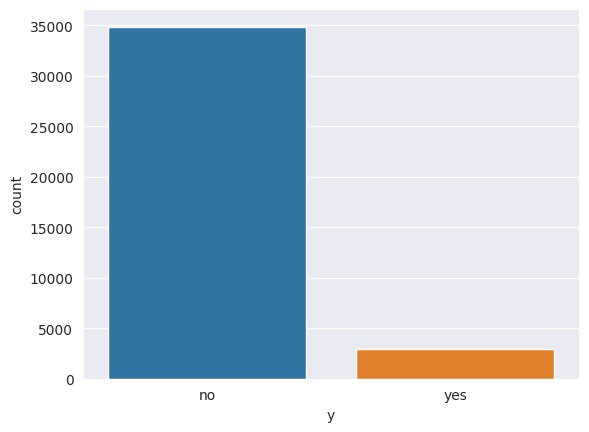

In [156]:
sns.countplot(x='y', data=df, order=df['y'].value_counts().index)

# Preprocessing for Neural Network

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
label_encoder = LabelEncoder()

In [159]:
df['y'] = label_encoder.fit_transform(df['y'])

/tmp/ipykernel_30/591832207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = label_encoder.fit_transform(df['y'])


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37784 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37784 non-null  int64  
 1   job             37784 non-null  object 
 2   marital         37784 non-null  object 
 3   education       37784 non-null  object 
 4   default         37784 non-null  object 
 5   housing         37784 non-null  object 
 6   loan            37784 non-null  object 
 7   contact         37784 non-null  object 
 8   month           37784 non-null  object 
 9   day_of_week     37784 non-null  object 
 10  duration        37784 non-null  int64  
 11  campaign        37784 non-null  int64  
 12  pdays           37784 non-null  int64  
 13  previous        37784 non-null  int64  
 14  poutcome        37784 non-null  object 
 15  emp.var.rate    37784 non-null  float64
 16  cons.price.idx  37784 non-null  float64
 17  cons.conf.idx   37784 non-null  floa

In [161]:
for column in ['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome']:
    df[column] = label_encoder.fit_transform(df[column])

/tmp/ipykernel_30/1428772359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
/tmp/ipykernel_30/1428772359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
/tmp/ipykernel_30/1428772359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37784 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37784 non-null  int64  
 1   job             37784 non-null  int64  
 2   marital         37784 non-null  int64  
 3   education       37784 non-null  int64  
 4   default         37784 non-null  int64  
 5   housing         37784 non-null  int64  
 6   loan            37784 non-null  int64  
 7   contact         37784 non-null  int64  
 8   month           37784 non-null  int64  
 9   day_of_week     37784 non-null  int64  
 10  duration        37784 non-null  int64  
 11  campaign        37784 non-null  int64  
 12  pdays           37784 non-null  int64  
 13  previous        37784 non-null  int64  
 14  poutcome        37784 non-null  int64  
 15  emp.var.rate    37784 non-null  float64
 16  cons.price.idx  37784 non-null  float64
 17  cons.conf.idx   37784 non-null  floa

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

X = df.drop('y', axis=1)  

y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network Development

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [166]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training and Evaluation

In [174]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9449 - loss: 0.1291 - val_accuracy: 0.9405 - val_loss: 0.1400
Epoch 2/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9467 - loss: 0.1258 - val_accuracy: 0.9416 - val_loss: 0.1406
Epoch 3/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9468 - loss: 0.1280 - val_accuracy: 0.9406 - val_loss: 0.1403
Epoch 4/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9478 - loss: 0.1244 - val_accuracy: 0.9410 - val_loss: 0.1408
Epoch 5/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9472 - loss: 0.1230 - val_accuracy: 0.9391 - val_loss: 0.1406
Epoch 6/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9441 - loss: 0.1276 - val_accuracy: 0.9410 - val_loss: 0.1422
Epoch 7/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9474 - loss: 0.1250 - val_accuracy: 0.9418 - val_loss: 0.1413
Epoch 8/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9461 - loss: 0.1262 - val_accuracy: 0.

In [175]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.1429
Test Accuracy: 93.86%


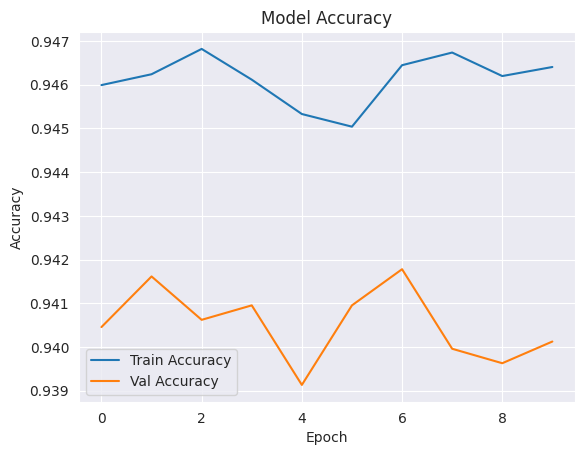

In [176]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()